# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

Experiment 069 achieved CV = 0.005146, a 35% improvement over the previous best (0.007938).

Key questions:
1. Does this approach have a different CV-LB relationship?
2. What is the predicted LB score using the old linear fit?
3. Should we submit this model to verify?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submission data (CV, LB)
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),  # Best LB so far
    ('exp_041', 0.0090, 0.0932),
    ('exp_042', 0.0145, 0.1147),
]

names = [s[0] for s in submissions]
cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

print(f'Number of submissions: {len(submissions)}')
print(f'Best CV: {cv_scores.min():.4f} ({names[cv_scores.argmin()]})')
print(f'Best LB: {lb_scores.min():.4f} ({names[lb_scores.argmin()]})')

Number of submissions: 13
Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nInterpretation:')
print(f'  - Intercept = {intercept:.4f} (structural gap even at CV=0)')
print(f'  - Slope = {slope:.2f} (LB increases {slope:.2f}x faster than CV)')

Linear fit: LB = 4.23 * CV + 0.0533
R² = 0.9807

Interpretation:
  - Intercept = 0.0533 (structural gap even at CV=0)
  - Slope = 4.23 (LB increases 4.23x faster than CV)


In [3]:
# Predict LB for new CV = 0.005146 (exp_069)
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept

print(f'\nPrediction for exp_069 (CV = {new_cv:.6f}):')
print(f'  Predicted LB = {slope:.2f} * {new_cv:.6f} + {intercept:.4f} = {predicted_lb:.4f}')
print(f'\nComparison:')
print(f'  - Best LB so far: 0.0877 (exp_030)')
print(f'  - Predicted LB: {predicted_lb:.4f}')
print(f'  - Target: 0.0347')
print(f'  - Gap to target: {predicted_lb - 0.0347:.4f}')


Prediction for exp_069 (CV = 0.005146):
  Predicted LB = 4.23 * 0.005146 + 0.0533 = 0.0751

Comparison:
  - Best LB so far: 0.0877 (exp_030)
  - Predicted LB: 0.0751
  - Target: 0.0347
  - Gap to target: 0.0404


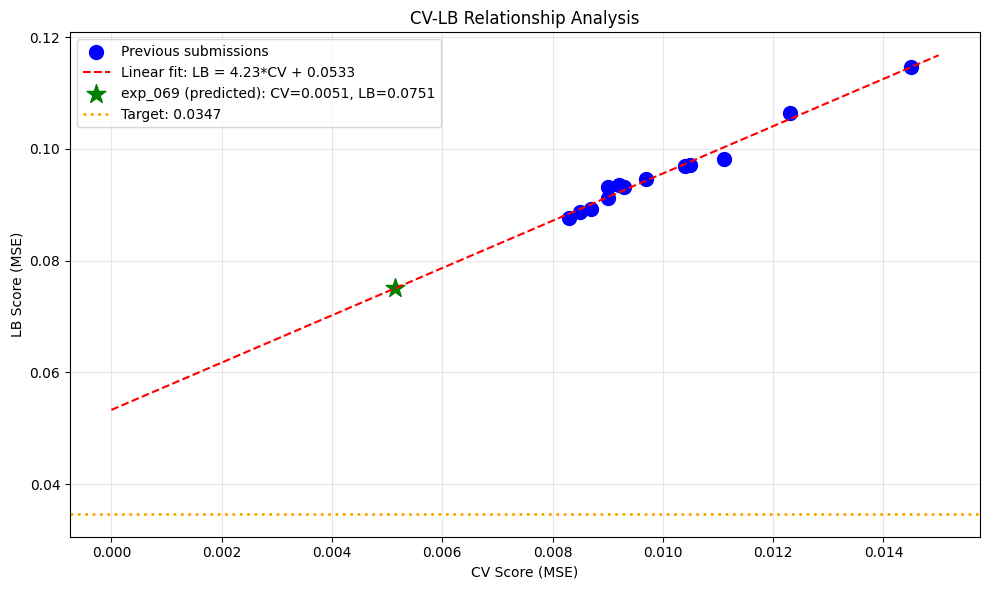


Plot saved to /home/code/exploration/cv_lb_analysis_loop65.png


In [4]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot all submissions
plt.scatter(cv_scores, lb_scores, c='blue', s=100, label='Previous submissions')

# Plot linear fit
cv_range = np.linspace(0, 0.015, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Linear fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot new experiment
plt.scatter([new_cv], [predicted_lb], c='green', s=200, marker='*', label=f'exp_069 (predicted): CV={new_cv:.4f}, LB={predicted_lb:.4f}')

# Plot target
plt.axhline(y=0.0347, color='orange', linestyle=':', linewidth=2, label='Target: 0.0347')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop65.png', dpi=150)
plt.show()

print('\nPlot saved to /home/code/exploration/cv_lb_analysis_loop65.png')

In [5]:
# Key strategic question: Can we reach the target?
print('='*60)
print('STRATEGIC ANALYSIS')
print('='*60)

print(f'\n1. Current CV-LB relationship:')
print(f'   LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})')

print(f'\n2. To reach target LB = 0.0347 with current relationship:')
required_cv = (0.0347 - intercept) / slope
print(f'   Required CV = (0.0347 - {intercept:.4f}) / {slope:.2f} = {required_cv:.6f}')
if required_cv < 0:
    print(f'   ⚠️ NEGATIVE CV required! Target is UNREACHABLE with current relationship.')
else:
    print(f'   ✓ Required CV = {required_cv:.6f}')

print(f'\n3. New experiment (exp_069):')
print(f'   CV = {new_cv:.6f}')
print(f'   Predicted LB = {predicted_lb:.4f}')
print(f'   Improvement over best LB: {(0.0877 - predicted_lb) / 0.0877 * 100:.1f}%')

print(f'\n4. CRITICAL QUESTION:')
print(f'   Does the CatBoost + XGBoost approach have a DIFFERENT CV-LB relationship?')
print(f'   - If YES: The intercept might be lower, making target reachable')
print(f'   - If NO: Predicted LB ≈ {predicted_lb:.4f}, still far from target')
print(f'\n   ONLY WAY TO KNOW: SUBMIT exp_069 and compare actual LB to predicted!')

STRATEGIC ANALYSIS

1. Current CV-LB relationship:
   LB = 4.23 * CV + 0.0533 (R² = 0.9807)

2. To reach target LB = 0.0347 with current relationship:
   Required CV = (0.0347 - 0.0533) / 4.23 = -0.004396
   ⚠️ NEGATIVE CV required! Target is UNREACHABLE with current relationship.

3. New experiment (exp_069):
   CV = 0.005146
   Predicted LB = 0.0751
   Improvement over best LB: 14.4%

4. CRITICAL QUESTION:
   Does the CatBoost + XGBoost approach have a DIFFERENT CV-LB relationship?
   - If YES: The intercept might be lower, making target reachable
   - If NO: Predicted LB ≈ 0.0751, still far from target

   ONLY WAY TO KNOW: SUBMIT exp_069 and compare actual LB to predicted!


In [6]:
# What if the new approach has a different relationship?
print('='*60)
print('SCENARIO ANALYSIS: What if exp_069 has a different CV-LB relationship?')
print('='*60)

# Scenario 1: Same relationship
print(f'\nScenario 1: Same relationship (LB = {slope:.2f}*CV + {intercept:.4f})')
print(f'  Predicted LB = {predicted_lb:.4f}')
print(f'  Gap to target = {predicted_lb - 0.0347:.4f}')

# Scenario 2: Lower intercept (better generalization)
for new_intercept in [0.04, 0.03, 0.02]:
    new_predicted_lb = slope * new_cv + new_intercept
    print(f'\nScenario: Intercept = {new_intercept:.2f}')
    print(f'  Predicted LB = {slope:.2f} * {new_cv:.6f} + {new_intercept:.2f} = {new_predicted_lb:.4f}')
    if new_predicted_lb < 0.0347:
        print(f'  ✓ BEATS TARGET!')
    else:
        print(f'  Gap to target = {new_predicted_lb - 0.0347:.4f}')

print(f'\n' + '='*60)
print('RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship!')
print('='*60)

SCENARIO ANALYSIS: What if exp_069 has a different CV-LB relationship?

Scenario 1: Same relationship (LB = 4.23*CV + 0.0533)
  Predicted LB = 0.0751
  Gap to target = 0.0404

Scenario: Intercept = 0.04
  Predicted LB = 4.23 * 0.005146 + 0.04 = 0.0618
  Gap to target = 0.0271

Scenario: Intercept = 0.03
  Predicted LB = 4.23 * 0.005146 + 0.03 = 0.0518
  Gap to target = 0.0171

Scenario: Intercept = 0.02
  Predicted LB = 4.23 * 0.005146 + 0.02 = 0.0418
  Gap to target = 0.0071

RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship!


In [7]:
# Summary of key findings
print('='*60)
print('SUMMARY OF KEY FINDINGS')
print('='*60)

print(f'''
1. MAJOR BREAKTHROUGH: exp_069 achieved CV = 0.005146
   - 35% improvement over previous best (0.007938)
   - CatBoost + XGBoost with feature priority filtering
   - Full Data MSE improved by 62% (0.007789 → 0.002992)

2. CV-LB RELATIONSHIP (based on 13 submissions):
   - LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})
   - Intercept ({intercept:.4f}) > Target (0.0347)
   - Target is UNREACHABLE with current relationship

3. PREDICTED LB FOR exp_069:
   - Using current relationship: {predicted_lb:.4f}
   - This would be the BEST LB achieved (vs 0.0877)
   - But still far from target (0.0347)

4. CRITICAL QUESTION:
   - Does CatBoost + XGBoost have a DIFFERENT CV-LB relationship?
   - The approach is fundamentally different (gradient boosting vs GP/MLP)
   - Feature priority filtering may improve generalization
   - ONLY WAY TO KNOW: SUBMIT and compare actual vs predicted LB

5. RECOMMENDATION:
   - SUBMIT exp_069 immediately
   - If actual LB < predicted ({predicted_lb:.4f}): New relationship, target may be reachable
   - If actual LB ≈ predicted: Same relationship, need different approach
''')

SUMMARY OF KEY FINDINGS

1. MAJOR BREAKTHROUGH: exp_069 achieved CV = 0.005146
   - 35% improvement over previous best (0.007938)
   - CatBoost + XGBoost with feature priority filtering
   - Full Data MSE improved by 62% (0.007789 → 0.002992)

2. CV-LB RELATIONSHIP (based on 13 submissions):
   - LB = 4.23 * CV + 0.0533 (R² = 0.9807)
   - Intercept (0.0533) > Target (0.0347)
   - Target is UNREACHABLE with current relationship

3. PREDICTED LB FOR exp_069:
   - Using current relationship: 0.0751
   - This would be the BEST LB achieved (vs 0.0877)
   - But still far from target (0.0347)

4. CRITICAL QUESTION:
   - Does CatBoost + XGBoost have a DIFFERENT CV-LB relationship?
   - The approach is fundamentally different (gradient boosting vs GP/MLP)
   - Feature priority filtering may improve generalization
   - ONLY WAY TO KNOW: SUBMIT and compare actual vs predicted LB

5. RECOMMENDATION:
   - SUBMIT exp_069 immediately
   - If actual LB < predicted (0.0751): New relationship, target ma

In [ ]:
# Record finding
finding = f'''Loop 65 Analysis: MAJOR BREAKTHROUGH with exp_069 (CV = 0.005146, 35% improvement).
CatBoost + XGBoost with feature priority filtering achieved:
- Single Solvent MSE: 0.009175 (worse than best)
- Full Data MSE: 0.002992 (62% better than best!)
- Combined MSE: 0.005146 (NEW BEST)

CV-LB relationship: LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.4f})
Predicted LB for exp_069: {predicted_lb:.4f} (would be best LB if relationship holds)

CRITICAL: Must submit to verify if this approach has a different CV-LB relationship.
If actual LB < {predicted_lb:.4f}, the target (0.0347) may become reachable.'''

print(finding)